In [1]:
from datAug import *

In [2]:
# mainUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow Preds(73p)/'
mainUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow(test)/'
AnnotedUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/roboflow Preds(73p)/'
testUrl = '/home/henri/Documents/Lighthouse-lab/Databases/final project db/flyerScrapedData/predsResults/'

In [3]:
directory = directoryImgTxtload(mainUrl,info=False)
directory[0:2]

[['101aug0_jpg.rf.5dc4855b0b8d00032ce73df506c818fd.jpg',
  '101aug0_jpg.rf.5dc4855b0b8d00032ce73df506c818fd.txt'],
 ['102aug1_jpg.rf.330ff2119e6c7664e1dd2736ff82a0e5.jpg',
  '102aug1_jpg.rf.330ff2119e6c7664e1dd2736ff82a0e5.txt']]

In [4]:
f=2

In [5]:
# slicing numpy
imageArray = loadImgToArray(mainUrl + directory[f][0], info=True)
test = loadingBBox(mainUrl + directory[f][1],imageArray,info=True)

#saveBBox(testUrl + directory[f][1],test, imageArray,info=True,mode='yolo')

From: <class 'PIL.JpegImagePlugin.JpegImageFile'>, Size: (832, 832), Mode: RGB
To: <class 'numpy.ndarray'>, shape: (832, 832, 3)
using the default mode so the data is converted

image width: 832 and height 832
before transform
<object-class>	<x>	<y>	<width>	<height>:
[[1.        0.234976  0.769231  0.126202  0.0240385]
 [1.        0.459135  0.769231  0.125     0.0288462]
 [0.        0.286659  0.8125    0.219952  0.129808 ]
 [1.        0.241587  0.25      0.115385  0.0288462]
 [1.        0.582933  0.240986  0.117788  0.0252404]
 [0.        0.509615  0.80649   0.211538  0.129808 ]
 [1.        0.574519  0.34976   0.127404  0.0264423]
 [1.        0.586538  0.668269  0.122596  0.03125  ]
 [1.        0.239183  0.439904  0.132212  0.0288462]
 [1.        0.239183  0.5625    0.127404  0.03125  ]
 [1.        0.238582  0.662861  0.13101   0.0276442]
 [1.        0.239183  0.346755  0.137019  0.0300481]
 [1.        0.581731  0.561899  0.134615  0.0324519]
 [1.        0.677885  0.766226  0.115385  0

In [6]:

test[:,1::]

array([[143.       , 630.000176 , 248.000064 , 650.000208 ],
       [330.00032  , 628.0001728, 434.00032  , 652.0002112],
       [147.000256 , 621.999872 , 330.00032  , 730.000128 ],
       [153.000224 , 195.9999808, 249.000544 , 220.0000192],
       [436.000448 , 190.0003456, 534.000064 , 211.0003584],
       [335.999872 , 616.999552 , 511.999488 , 724.999808 ],
       [424.999744 , 280.0003232, 530.999872 , 302.0003168],
       [436.99968  , 542.999808 , 538.999552 , 568.999808 ],
       [144.000064 , 354.0001088, 254.000448 , 378.0001472],
       [146.000192 , 455.       , 252.00032  , 481.       ],
       [144.000064 , 540.0003648, 253.000384 , 563.0003392],
       [142.000352 , 276.0001504, 256.00016  , 301.0001696],
       [428.000352 , 453.9999776, 540.000032 , 480.9999584],
       [516.00016  , 625.0000224, 612.00048  , 650.0000416],
       [425.999808 , 365.0000224, 536.000192 , 390.0000416],
       [511.999904 , 621.999872 , 705.99984  , 730.000128 ],
       [141.99952  , 178

In [7]:
int(test[:,0:1:][0])

1

In [8]:
labelTranslator = {0: 'Merchandise',1:'price'}
labelTranslator[int(test[:,0:1:][0])]

'price'

In [9]:
def whatIsIT(classBox):
    labelTranslator = {0: 'Merchandise',1:'price'}
    return labelTranslator[int(classBox)]


In [13]:
# slicing numpy
f=0
results = dict()
imageArray = loadImgToArray(mainUrl + directory[f][0], info=False)
test = loadingBBox(mainUrl + directory[f][1],imageArray,info=False)
for i in range(len(test[:,1::])):
    firstBox = test[:,1::][i]
    classBox = whatIsIT(test[:,0:1:][i])
    testImg = imageArray[int(firstBox[1]):int(firstBox[3]) , int(firstBox[0]):int(firstBox[2]),:]
    if  classBox=='Merchandise':
        print('Saved')
        results[i] = [test[i],testImg]
    # info
    #print(f'Class: {classBox}\nbox coords \t<x1>\t<y1>\t<x2>\t<y2>:\n{firstBox}')
    #showImg(testImg)
#reindexing the dict results
reindexDict = {i: v for i, v in enumerate(results.values())}

Saved
Saved
Saved
Saved
Saved
Saved
Saved


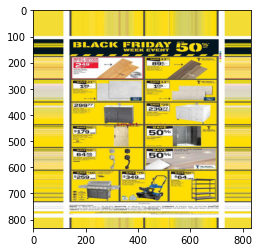

In [10]:
    showImg(imageArray)

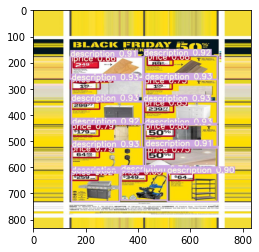

In [11]:

showImg(loadImgToArray(AnnotedUrl + directory[f][0], info=False))

In [12]:
loadingBBox(mainUrl + directory[f][1],imageArray,info=False)

array([[  1.       , 143.       , 630.000176 , 248.000064 , 650.000208 ],
       [  1.       , 330.00032  , 628.0001728, 434.00032  , 652.0002112],
       [  0.       , 147.000256 , 621.999872 , 330.00032  , 730.000128 ],
       [  1.       , 153.000224 , 195.9999808, 249.000544 , 220.0000192],
       [  1.       , 436.000448 , 190.0003456, 534.000064 , 211.0003584],
       [  0.       , 335.999872 , 616.999552 , 511.999488 , 724.999808 ],
       [  1.       , 424.999744 , 280.0003232, 530.999872 , 302.0003168],
       [  1.       , 436.99968  , 542.999808 , 538.999552 , 568.999808 ],
       [  1.       , 144.000064 , 354.0001088, 254.000448 , 378.0001472],
       [  1.       , 146.000192 , 455.       , 252.00032  , 481.       ],
       [  1.       , 144.000064 , 540.0003648, 253.000384 , 563.0003392],
       [  1.       , 142.000352 , 276.0001504, 256.00016  , 301.0001696],
       [  1.       , 428.000352 , 453.9999776, 540.000032 , 480.9999584],
       [  1.       , 516.00016  , 625.

Easier to slice using np arrays than pil format 

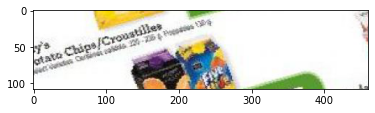

In [14]:
plt.imshow(reindexDict[0][1])

number of items 7


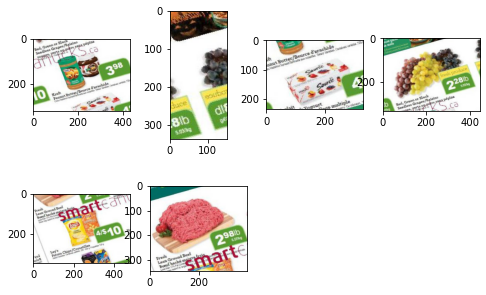

In [15]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 8))
columns = round(sqrt(len(reindexDict))) + 1
rows = round(sqrt(len(reindexDict))) 
print(f'number of items {len(reindexDict)}')
for i in range(1, columns*rows +1):

    if i< len(reindexDict):
        img = reindexDict[i][1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    else:
        pass
plt.show()
